<a href="https://colab.research.google.com/github/spatank/Curiosity/blob/master/v4/persistent_homology_KNOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Curiosity/')

Mounted at /content/drive


In [2]:
!ls # run !ls to verify location

KNOT  persistent_homology_KNOT.ipynb  Wiki


In [19]:
import glob
import scipy
import scipy.io as sio
from scipy.io import savemat

In [17]:
import sys
!{sys.executable} -m pip install Cython

In [18]:
import sys
!{sys.executable} -m pip install Ripser

     |████████████████████████████████| 71kB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 5.6MB/s 
  Created wheel for Ripser: filename=ripser-0.6.0-cp37-cp37m-linux_x86_64.whl size=454952 sha256=7a06402dad669945d374b70a3e6667c636918ad23bbc2c9e26bc8009d6f95928
  Stored in directory: /root/.cache/pip/wheels/95/1e/13/59da989de59903698d767dcb19414163e683a2dd31edf80417
Successfully built Ripser
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18091 sha256=9ec31f9782f1c489ac7e1886eea669a348bcbad29bbe408dedd98a97c3dbb7cb
  Stored in directory: /root/.cache/pip/wheels/2b/e1/c9/1993c7f7f114b7d3fb2d3e895e02157a7ebf554861e9e54e01
Successfully built hopcroftkarp


In [39]:
import sys
!{sys.executable} -m pip install traces

  Created wheel for infinity: filename=infinity-1.5-cp37-none-any.whl size=3082 sha256=c2fe6a8d6966162beb463f371513b2664e9f4c5ae4e3e810850262104d851724
  Stored in directory: /root/.cache/pip/wheels/34/19/d8/ad497df8070dc60060283bec5f2806e237095bbf677eacfae5
Successfully built infinity


In [40]:
from ripser import ripser
import traces
import numpy as np
import matplotlib.pyplot as plt

def get_barcode(filt_mat, maxdim = 2):
    """
    Calculates the persistent homology for a given filtration matrix
    ``filt_mat``, default dimensions 0 through 2. Wraps ripser.
    """
    b = ripser(filt_mat, distance_matrix = True, maxdim = maxdim)['dgms']
    return list(zip(range(maxdim + 1), b))

def plot_barcode(bars, length, dims=[0, 1, 2], end=True):
    """
    Takes in bars, as generated by, e.g., ripser, and plots the barcode.
    """
    bars = dict(bars)
    count = 1
    has_inf = False
    colors = ['xkcd:emerald green', 'xkcd:tealish', 'xkcd:peacock blue']
    # iterate through dimension
    for d in dims:
        bn = bars[d]
        bn = sorted(bn, key=lambda x: x[0])
        for b, i in zip(bn, range(len(bn))):
            # extend in the case of infinite cycles
            if b[1] == np.inf:
                has_inf = True
                b = (b[0], 1.3*length)
            # plot first one with label
            if i == 0:
                plt.plot(b, [count, count], color=colors[d],
                         label='{}-cycles'.format(d))
            else:
                plt.plot(b, [count, count], color=colors[d])
            count += 1
        count += 1
    # add end of filtration line
    plt.axvline(x=length, color='xkcd:grey', alpha=0.5, linestyle=':')
    if end:
        plt.annotate('Filtration end', (length+10, 0.5*count), rotation=270,
                     color='xkcd:grey', alpha=0.5)
    lims = plt.xlim()
    plt.xlim([-0.05*length, length*1.05])
    plt.xlabel('Nodes')
    plt.ylabel('Cycle Number')

def betti_curves(bars, length):
    """
    Takes in bars and returns the betti curves
    """
    bettis = np.zeros((len(bars), length))
    for i in range(bettis.shape[0]):
        bn = bars[i][1]
        for bar in bn:
            birth = int(bar[0])
            death = length+1 if np.isinf(bar[1]) else int(bar[1]+1)
            bettis[i][birth:death] += 1
    return bettis

In [11]:
files = glob.glob('/content/drive/My Drive/Curiosity/KNOT/Preprocessed/*.mat')
mat_file = files[0]

In [14]:
# test code with Subject 101
mat_contents = sio.loadmat(mat_file)

subj = mat_contents['subj']
orig_G = mat_contents['orig_G']
nodes = mat_contents['nodes']

nodes_kept = mat_contents['nodes_kept']
G = mat_contents['G']
weighted_G = mat_contents['weighted_G']

edges_rewired_weighted = mat_contents['edges_rewired_weighted']
new_node_order = mat_contents['new_node_order']
nodes_reordered_weighted = mat_contents['nodes_reordered_weighted']

# test = nodes_reordered_weighted[:, :, 0]
# test

In [41]:
bars = get_barcode(weighted_G)

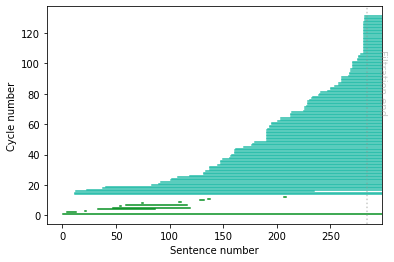

In [42]:
plot_barcode(bars, len(nodes_kept))

In [46]:
betti = betti_curves(bars, len(nodes_kept))
betti.shape

(3, 284)

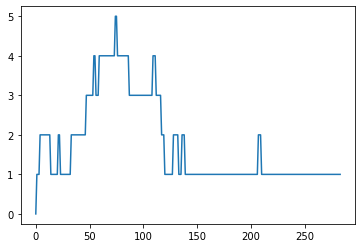

In [48]:
plt.plot(betti[0])

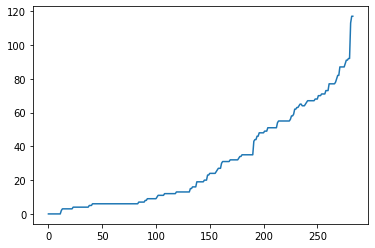

In [49]:
plt.plot(betti[1])

In [51]:
betti[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,   3.,
         3.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,   4.,
         4.,   4.,   4.,   4.,   4.,   5.,   5.,   5.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,   6.,
         6.,   6.,   6.,   6.,   6.,   6.,   6.,   7.,   7.,   7.,   7.,
         7.,   7.,   8.,   8.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,  10.,  11.,  11.,  11.,  11.,  11.,  11.,  12.,  12.,
        12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  12.,  13.,  13.,
        13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,  13.,
        15.,  15.,  16.,  16.,  16.,  16.,  19.,  19.,  19.,  19.,  19.,
        19.,  19.,  20.,  20.,  20.,  23.,  23.,  2

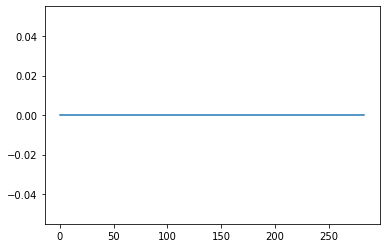

In [50]:
plt.plot(betti[2])